In [2]:
%pip install numpy scikit-learn matplotlib pandas


You should consider upgrading via the '/Users/hrntsm/Desktop/TunnyHandson/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline


# データの作成


In [4]:
true_w1 = 1.5
true_w2 = 0.8


In [34]:
N = 10
x_data = np.random.uniform(-5, 5, size=N)
y_data = true_w1 * x_data + true_w2 + np.random.normal(0, 1, size=N)


# 線形回帰


In [6]:
lr = LinearRegression()
lr.fit(x_data.reshape(N, 1), y_data.reshape(N, 1))
print(lr.coef_)
print(lr.intercept_)


[[1.53042458]]
[0.93594355]


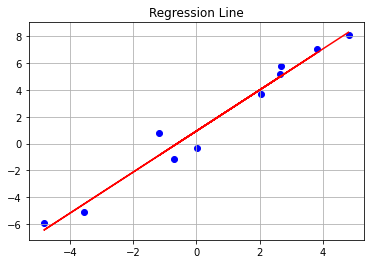

In [7]:
plt.scatter(x_data, y_data, color='blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(x_data, lr.predict(x_data.reshape(N, 1)), color='red')  # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.grid()                                 # グリッド線を表示

plt.show()


# ベイズ線形回帰

参考

- [PyMC3 を使った Python ベイズ推定超入門（その 3）ベイズ型線形回帰モデルを作ってみよう！](https://www.salesanalytics.co.jp/datascience/datascience110/)
- [Python で始めるベイズ機械学習入門](https://www.kspub.co.jp/book/detail/5279786.html)

以下のコードは「Python で始めるベイズ機械学習入門」のサンプルの引用です。これらのコードは MIT ライセンスで公開されています。  

- https://github.com/sammy-suyama/PythonBayesianMLBook

In [8]:
%pip install pymc3


You should consider upgrading via the '/Users/hrntsm/Desktop/TunnyHandson/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pymc3 as pm
import arviz as az


In [10]:
with pm.Model() as model:
    x = pm.Data('x', x_data)
    w1 = pm.Normal('w1', mu=0.0, sigma=10.0)
    w2 = pm.Normal('w2', mu=0.0, sigma=10.0)
    y = pm.Normal('y', mu=w1 * x + w2, sigma=1.0, observed=y_data)

with model:
    trace = pm.sample(3000, tune=1000, chains=3, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [w2, w1]


/Users/hrntsm/Desktop/TunnyHandson/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/hrntsm/Desktop/TunnyHandson/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/hrntsm/Desktop/TunnyHandson/venv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 3 chains for 1_000 tune and 3_000 draw iterations (3_000 + 9_000 draws total) took 5 seconds.


array([<AxesSubplot:title={'center':'w1'}>,
       <AxesSubplot:title={'center':'w2'}>], dtype=object)

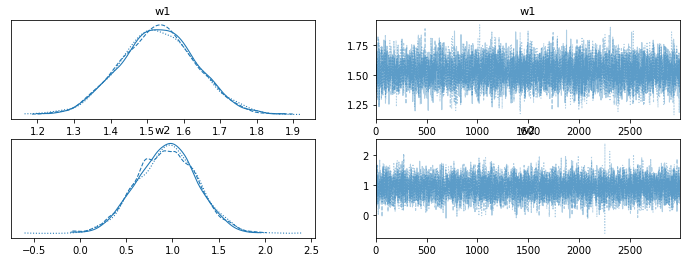

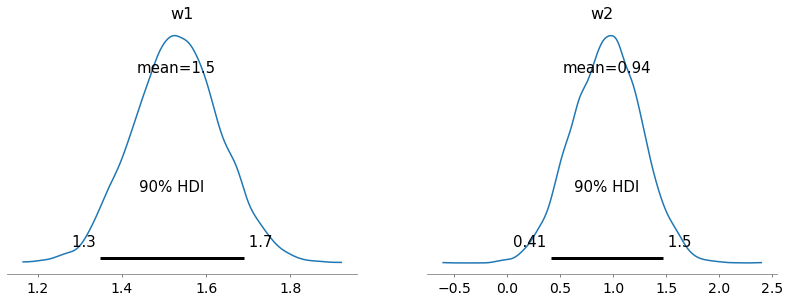

In [25]:
az.plot_trace(trace)
az.plot_posterior(trace, hdi_prob=0.90)


/Users/hrntsm/Desktop/TunnyHandson/venv/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


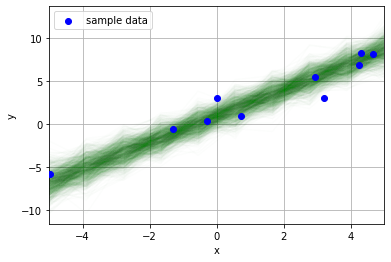

In [47]:
x_new = np.linspace(-5, 5, 10)

with model:
    pm.set_data(({'x': x_new}))

    pred = pm.sample_posterior_predictive(trace, samples=1000)

    y_predict_samples = pred['y']
    for i in range(1000):
        plt.plot(x_new, y_predict_samples[i, :], color='g', alpha=0.01)

    plt.scatter(x_data, y_data, color='blue', label="sample data", zorder=i+2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-5, 5)
    plt.legend()
    plt.grid()


/Users/hrntsm/Desktop/TunnyHandson/venv/lib/python3.9/site-packages/arviz/plots/hdiplot.py:157: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


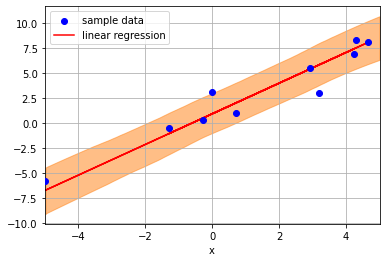

In [46]:
ax = az.plot_hdi(x_new, y_predict_samples, hdi_prob=0.95)
ax.scatter(x_data, y_data, color='blue', label="sample data", zorder=i+2)
ax.plot(x_data, lr.predict(x_data.reshape(N, 1)), color='red', label="linear regression")
ax.set_xlabel('x')
ax.set_xlabel('x')
ax.set_xlim(-5, 5)
ax.legend()
ax.grid()

## まとめ

事前分布として各値を設定し、そこから事後分布をマルコフ連鎖モンテカルロ法を使って求め、ベイズ線形回帰を行いました。
不確かさを持ちながら値を予想する手法として使われています。